In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
111748
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [18]:
def transition_freedom(input_str: str):
    transition_freedom: dict[str, dict] = {}

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        prev_idx = inp_idx - 1
        prev_inp = input_str[prev_idx]

        transition_freedom.setdefault(prev_inp, {})
        transition_freedom[prev_inp].setdefault(inp, 0)

    # print(transition_freedom)

    for tf_key, tf in transition_freedom.items():
        transition_freedom[tf_key] = len(tf)
    
    # print(transition_freedom)

    return transition_freedom
        


In [19]:
TF_per_symbol = transition_freedom(input_str)
TF = []
for inp in input_str:
    TF.append(TF_per_symbol[inp])
print(len(TF), TF[:400])

111748 [16, 15, 22, 16, 18, 26, 22, 25, 22, 26, 25, 14, 15, 22, 16, 15, 25, 14, 26, 25, 22, 22, 26, 25, 22, 26, 18, 22, 26, 21, 18, 16, 26, 21, 25, 18, 26, 25, 14, 22, 26, 26, 22, 26, 25, 18, 15, 26, 25, 16, 26, 26, 15, 25, 22, 26, 21, 25, 21, 26, 15, 26, 25, 11, 26, 26, 21, 25, 22, 26, 21, 25, 18, 15, 26, 25, 21, 18, 26, 22, 22, 26, 21, 25, 11, 26, 12, 22, 26, 25, 15, 26, 22, 26, 25, 22, 21, 25, 26, 21, 14, 22, 22, 21, 25, 11, 26, 22, 22, 25, 16, 26, 15, 22, 26, 12, 25, 21, 26, 14, 26, 21, 18, 22, 22, 22, 21, 25, 26, 26, 14, 25, 11, 18, 15, 16, 25, 11, 18, 15, 16, 25, 11, 18, 15, 16, 25, 26, 26, 25, 18, 15, 26, 25, 11, 22, 16, 12, 25, 26, 12, 25, 15, 22, 21, 25, 15, 26, 22, 21, 25, 11, 26, 15, 22, 26, 21, 25, 16, 15, 22, 22, 21, 18, 26, 16, 15, 26, 22, 25, 22, 26, 11, 22, 26, 25, 22, 18, 25, 22, 21, 25, 22, 21, 25, 12, 22, 22, 25, 22, 21, 25, 15, 26, 25, 12, 26, 26, 14, 21, 25, 18, 15, 26, 25, 26, 26, 20, 12, 25, 14, 22, 12, 25, 26, 12, 25, 16, 26, 15, 22, 26, 12, 25, 21, 26, 14, 26, 

(400,)


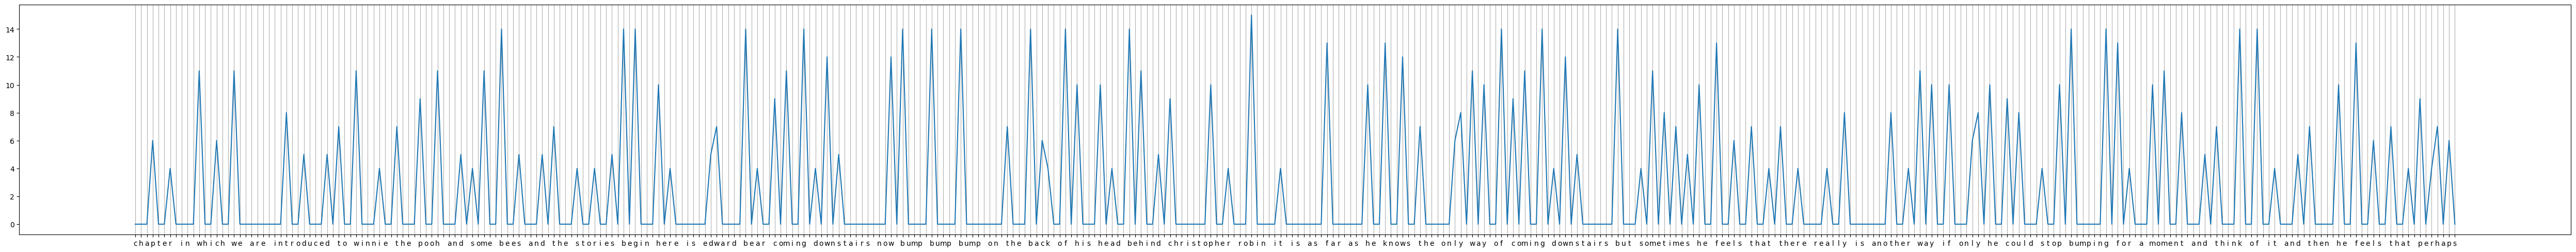

In [20]:
length = 400

TF = TF[:length]

TF = np.array(TF, dtype=float)
print(TF.shape)
TF = TF - np.pad(TF, (1, 0))[:-1]
# # print(TF)
TF[np.where(TF > 0)] = 0
TF = np.abs(TF)
TF[np.where(TF <= np.mean(TF))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

# KF = np.array(KF)
# KF = KF - np.pad(KF, (0, 1))[1:]
# # print(TF)
# KF[np.where(KF < 0)] = 0
# KF = np.abs(KF)
# KF[np.where(KF <= np.mean(KF[np.where(KF > 0)]))] = 0

# # TF /= np.max(TF)
# KF /= np.max(KF)

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
# axs.plot(np.arange(TF.size), TF)
axs.plot(np.arange(TF.size), TF)
axs.xaxis.set_ticks(np.arange(len(input_str[:length])) ,input_str[:length])
axs.xaxis.grid(True)

plt.show()